# UserBasicClassifier
Un classificador básico con la matadata del usuario

In [43]:
import pandas as pd
import numpy as np

import os
import pickle

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [44]:
users = pd.read_pickle('trainDatasets/users.pkl')
users.head()

,Cat,bot,crawled_at,created_at,default_profile,description,geo_enabled,id,lang,listed_count,...,time_zone,timestamp,updated,url,utc_offset,tweet_count,favs_tiempo,followers_tiempo,statuses_tiempo,friends_tiempo
0,SocialSpambot1,True,2014-04-19 14:46:19,Tue Mar 17 08:51:12 +0000 2009,1.0,True,True,24858289,True,0,...,Rome,2009-03-17 09:51:12,2016-03-15 14:12:22,False,7200.0,2518.0,0.062251,1.369531,80.864594,2.490057
1,SocialSpambot1,True,2014-05-18 23:20:58,Sun Apr 19 14:38:04 +0000 2009,0.0,True,True,33212890,True,110,...,Greenland,2009-04-19 16:38:04,2016-03-15 14:17:13,True,-7200.0,3204.0,1020.440156,783.576770,1164.354781,214.717876
2,SocialSpambot1,True,2014-05-13 23:21:54,Wed May 13 15:34:41 +0000 2009,0.0,True,False,39773427,True,6,...,Rome,2009-05-13 17:34:41,2016-03-15 14:16:44,False,7200.0,3216.0,0.887230,38.024155,1456.768757,47.847062
3,SocialSpambot1,True,2014-05-19 23:24:18,Wed Jul 15 12:55:03 +0000 2009,0.0,True,False,57007623,True,2,...,Pacific Time (US & Canada),2009-07-15 14:55:03,2016-03-15 14:18:54,False,-25200.0,3231.0,0.719522,26.033600,521.653169,22.893869
4,SocialSpambot1,True,2014-05-11 23:22:23,Wed Aug 05 21:12:49 +0000 2009,0.0,True,True,63258466,True,8,...,Rome,2009-08-05 23:12:49,2016-03-15 14:17:05,True,7200.0,3201.0,10.775305,27.470376,1344.784653,26.938262


In [45]:
users.applymap(type).crawled_at[0]

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
# Quedarnos solo con las columnas utilizables
users = users[['id','Cat','bot','default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]

# Generar ejes X de features y Normalizarlo
X = users.drop(columns=['Cat','bot'])  #[users.Cat!='SocialSpambot1']
atributos = X.columns
X = preprocessing.scale(X, axis = 0)

# Generar ejes Y de targets y encodear las etiquetas
le = preprocessing.LabelEncoder()
y =  le.fit_transform(users['bot'])  #[users.Cat!='SocialSpambot1']

# Separar entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Generar ejes X de features y Normalizarlo
#X_escond = users.drop(columns=['Cat','bot'])[users.Cat=='SocialSpambot1']
#X_escond = preprocessing.scale(X, axis = 0)


/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.025637
0:	learn: 0.6251491	total: 22.9ms	remaining: 22.9s
1:	learn: 0.5643700	total: 46.7ms	remaining: 23.3s
2:	learn: 0.5091494	total: 67.7ms	remaining: 22.5s
3:	learn: 0.4628551	total: 88.6ms	remaining: 22.1s
4:	learn: 0.4193311	total: 109ms	remaining: 21.8s
5:	learn: 0.3779238	total: 131ms	remaining: 21.7s
6:	learn: 0.3422150	total: 153ms	remaining: 21.7s
7:	learn: 0.3137702	total: 174ms	remaining: 21.5s
8:	learn: 0.2884532	total: 196ms	remaining: 21.5s
9:	learn: 0.2673848	total: 225ms	remaining: 22.3s
10:	learn: 0.2454861	total: 249ms	remaining: 22.4s
11:	learn: 0.2266340	total: 270ms	remaining: 22.2s
12:	learn: 0.2069730	total: 291ms	remaining: 22.1s
13:	learn: 0.1900566	total: 312ms	remaining: 22s
14:	learn: 0.1755467	total: 333ms	remaining: 21.9s
15:	learn: 0.1617355	total: 355ms	remaining: 21.8s
16:	learn: 0.1525064	total: 377ms	remaining: 21.8s
17:	learn: 0.1422675	total: 404ms	remaining: 22s
18:	learn: 0.1326915	total: 433ms	remaining: 22.4s
19:	learn: 

164:	learn: 0.0251662	total: 4.34s	remaining: 22s
165:	learn: 0.0251609	total: 4.37s	remaining: 22s
166:	learn: 0.0250591	total: 4.39s	remaining: 21.9s
167:	learn: 0.0249789	total: 4.42s	remaining: 21.9s
168:	learn: 0.0249249	total: 4.44s	remaining: 21.8s
169:	learn: 0.0248940	total: 4.47s	remaining: 21.8s
170:	learn: 0.0248017	total: 4.49s	remaining: 21.8s
171:	learn: 0.0247568	total: 4.51s	remaining: 21.7s
172:	learn: 0.0246309	total: 4.53s	remaining: 21.7s
173:	learn: 0.0246115	total: 4.56s	remaining: 21.7s
174:	learn: 0.0245575	total: 4.59s	remaining: 21.7s
175:	learn: 0.0245291	total: 4.63s	remaining: 21.7s
176:	learn: 0.0245032	total: 4.66s	remaining: 21.7s
177:	learn: 0.0244037	total: 4.69s	remaining: 21.7s
178:	learn: 0.0243020	total: 4.72s	remaining: 21.7s
179:	learn: 0.0242592	total: 4.76s	remaining: 21.7s
180:	learn: 0.0241165	total: 4.79s	remaining: 21.7s
181:	learn: 0.0240716	total: 4.83s	remaining: 21.7s
182:	learn: 0.0240468	total: 4.85s	remaining: 21.7s
183:	learn: 0.02

326:	learn: 0.0176836	total: 8.32s	remaining: 17.1s
327:	learn: 0.0176357	total: 8.35s	remaining: 17.1s
328:	learn: 0.0176237	total: 8.37s	remaining: 17.1s
329:	learn: 0.0175347	total: 8.39s	remaining: 17s
330:	learn: 0.0174767	total: 8.41s	remaining: 17s
331:	learn: 0.0174625	total: 8.44s	remaining: 17s
332:	learn: 0.0174092	total: 8.46s	remaining: 16.9s
333:	learn: 0.0173365	total: 8.48s	remaining: 16.9s
334:	learn: 0.0173160	total: 8.5s	remaining: 16.9s
335:	learn: 0.0172612	total: 8.52s	remaining: 16.8s
336:	learn: 0.0172452	total: 8.54s	remaining: 16.8s
337:	learn: 0.0171999	total: 8.57s	remaining: 16.8s
338:	learn: 0.0171763	total: 8.59s	remaining: 16.7s
339:	learn: 0.0171614	total: 8.6s	remaining: 16.7s
340:	learn: 0.0171552	total: 8.62s	remaining: 16.7s
341:	learn: 0.0171345	total: 8.64s	remaining: 16.6s
342:	learn: 0.0171306	total: 8.66s	remaining: 16.6s
343:	learn: 0.0170733	total: 8.68s	remaining: 16.5s
344:	learn: 0.0169958	total: 8.7s	remaining: 16.5s
345:	learn: 0.0169776

489:	learn: 0.0126588	total: 11.7s	remaining: 12.2s
490:	learn: 0.0126453	total: 11.7s	remaining: 12.1s
491:	learn: 0.0126433	total: 11.7s	remaining: 12.1s
492:	learn: 0.0126366	total: 11.8s	remaining: 12.1s
493:	learn: 0.0126204	total: 11.8s	remaining: 12.1s
494:	learn: 0.0126124	total: 11.8s	remaining: 12s
495:	learn: 0.0125643	total: 11.8s	remaining: 12s
496:	learn: 0.0125464	total: 11.9s	remaining: 12s
497:	learn: 0.0125441	total: 11.9s	remaining: 12s
498:	learn: 0.0124998	total: 11.9s	remaining: 11.9s
499:	learn: 0.0124688	total: 11.9s	remaining: 11.9s
500:	learn: 0.0124397	total: 12s	remaining: 11.9s
501:	learn: 0.0124390	total: 12s	remaining: 11.9s
502:	learn: 0.0124081	total: 12s	remaining: 11.9s
503:	learn: 0.0123645	total: 12s	remaining: 11.8s
504:	learn: 0.0123277	total: 12s	remaining: 11.8s
505:	learn: 0.0122596	total: 12.1s	remaining: 11.8s
506:	learn: 0.0122293	total: 12.1s	remaining: 11.7s
507:	learn: 0.0121973	total: 12.1s	remaining: 11.7s
508:	learn: 0.0121592	total: 1

651:	learn: 0.0096638	total: 15.1s	remaining: 8.05s
652:	learn: 0.0096325	total: 15.1s	remaining: 8.03s
653:	learn: 0.0096199	total: 15.1s	remaining: 8.01s
654:	learn: 0.0096147	total: 15.2s	remaining: 7.98s
655:	learn: 0.0096145	total: 15.2s	remaining: 7.95s
656:	learn: 0.0095548	total: 15.2s	remaining: 7.92s
657:	learn: 0.0095546	total: 15.2s	remaining: 7.9s
658:	learn: 0.0095529	total: 15.2s	remaining: 7.87s
659:	learn: 0.0095351	total: 15.2s	remaining: 7.85s
660:	learn: 0.0095257	total: 15.3s	remaining: 7.83s
661:	learn: 0.0095254	total: 15.3s	remaining: 7.8s
662:	learn: 0.0095005	total: 15.3s	remaining: 7.78s
663:	learn: 0.0095002	total: 15.3s	remaining: 7.75s
664:	learn: 0.0094995	total: 15.3s	remaining: 7.72s
665:	learn: 0.0094992	total: 15.3s	remaining: 7.7s
666:	learn: 0.0094487	total: 15.4s	remaining: 7.67s
667:	learn: 0.0094141	total: 15.4s	remaining: 7.65s
668:	learn: 0.0094041	total: 15.4s	remaining: 7.63s
669:	learn: 0.0093928	total: 15.4s	remaining: 7.6s
670:	learn: 0.00

820:	learn: 0.0075087	total: 18.5s	remaining: 4.02s
821:	learn: 0.0075017	total: 18.5s	remaining: 4s
822:	learn: 0.0074947	total: 18.5s	remaining: 3.98s
823:	learn: 0.0074943	total: 18.5s	remaining: 3.96s
824:	learn: 0.0074809	total: 18.5s	remaining: 3.93s
825:	learn: 0.0074685	total: 18.6s	remaining: 3.91s
826:	learn: 0.0074680	total: 18.6s	remaining: 3.89s
827:	learn: 0.0074628	total: 18.6s	remaining: 3.86s
828:	learn: 0.0074611	total: 18.6s	remaining: 3.84s
829:	learn: 0.0074325	total: 18.6s	remaining: 3.82s
830:	learn: 0.0074309	total: 18.6s	remaining: 3.79s
831:	learn: 0.0074107	total: 18.7s	remaining: 3.77s
832:	learn: 0.0073987	total: 18.7s	remaining: 3.75s
833:	learn: 0.0073843	total: 18.7s	remaining: 3.73s
834:	learn: 0.0073810	total: 18.7s	remaining: 3.7s
835:	learn: 0.0073698	total: 18.8s	remaining: 3.68s
836:	learn: 0.0073543	total: 18.8s	remaining: 3.66s
837:	learn: 0.0073384	total: 18.8s	remaining: 3.63s
838:	learn: 0.0073350	total: 18.8s	remaining: 3.61s
839:	learn: 0.00

985:	learn: 0.0060614	total: 21.6s	remaining: 306ms
986:	learn: 0.0060604	total: 21.6s	remaining: 284ms
987:	learn: 0.0060584	total: 21.6s	remaining: 263ms
988:	learn: 0.0060501	total: 21.6s	remaining: 241ms
989:	learn: 0.0060422	total: 21.7s	remaining: 219ms
990:	learn: 0.0060396	total: 21.7s	remaining: 197ms
991:	learn: 0.0060340	total: 21.7s	remaining: 175ms
992:	learn: 0.0060306	total: 21.7s	remaining: 153ms
993:	learn: 0.0060249	total: 21.7s	remaining: 131ms
994:	learn: 0.0060237	total: 21.7s	remaining: 109ms
995:	learn: 0.0060026	total: 21.8s	remaining: 87.4ms
996:	learn: 0.0060025	total: 21.8s	remaining: 65.5ms
997:	learn: 0.0060019	total: 21.8s	remaining: 43.7ms
998:	learn: 0.0060007	total: 21.8s	remaining: 21.8ms
999:	learn: 0.0059995	total: 21.8s	remaining: 0us


In [51]:
# Predict y PredictProba
y_predicted_cat = model.predict_proba(X_test)
y_pred = model.predict(X_test)

El valor del AUC es:  0.9966636957813428


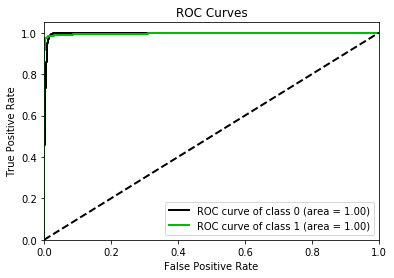

In [52]:
# AUC y Curva
from sklearn.metrics import roc_auc_score
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)
from scikitplot.metrics import plot_roc
%matplotlib inline
plot_roc(y_test,y_predicted_cat, plot_micro = False, plot_macro= False)

In [53]:
# Matriz de Confusión
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['pred_'+str(c) for c in le.classes_]
pd.DataFrame(conf, index= ['real_Human','real_Bot'],columns = ['pred_Human','pred_Bot'])

,pred_Human,pred_Bot
real_Human,272,3
real_Bot,24,1200


In [54]:
# Scores Modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       275
           1       1.00      0.98      0.99      1224

    accuracy                           0.98      1499
   macro avg       0.96      0.98      0.97      1499
weighted avg       0.98      0.98      0.98      1499



In [58]:
# Exportar Modelo a archivo binario
model.save_model("modelo")
# Se carga luego con CatBoostClassifier().load_model("modelo")